# Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/1.5k Data Set 2.csv", encoding="utf-8")

df.drop(columns=["market_cap_usd", "enterprise_value_usd", "volume"], inplace=True)

print("\nShape of the dataset:")
print(df.shape)


Shape of the dataset:
(46454, 15)


## Cleaning to not have any empty values

In [2]:
# Drop rows with any empty values (NaN)
df["growth"] = df["growth"].fillna(0.0)
df["dividend"] = df["dividend"].fillna(0.0)


df_no_nan = df.dropna()


# Display the shape of the cleaned dataset
print("\nShape of the dataset after cleaning:")
print(df_no_nan.shape)


Shape of the dataset after cleaning:
(3706, 15)


# Analyzing

In [3]:
# Lets analyze the distribution of the data
print("\nDistribution of the data:")
print(df_no_nan.describe())


Distribution of the data:
           quality       growth        value     dividend    profit_1m  \
count  3706.000000  3706.000000  3706.000000  3706.000000  3706.000000   
mean     57.621258    42.084730    53.306952    37.820889     0.033025   
std      17.901010    33.378942    22.761145    35.179803     0.840073   
min       1.168604     0.000000     0.000000     0.000000    -0.845445   
25%      44.996320     7.317462    37.007774     0.000000    -0.059707   
50%      59.835037    42.085460    54.880423    36.797671    -0.003973   
75%      70.759606    68.662650    70.996700    72.159395     0.072411   
max      98.889835   100.000000   100.000000   100.000000    49.000000   

         profit_3m    profit_6m    profit_1y    profit_2y    profit_5y  
count  3706.000000  3706.000000  3706.000000  3706.000000  3706.000000  
mean      1.073861     0.102072     0.075945     0.152473     0.443454  
std      63.176665     1.374331     0.711758     0.971068     2.770624  
min      -0.91

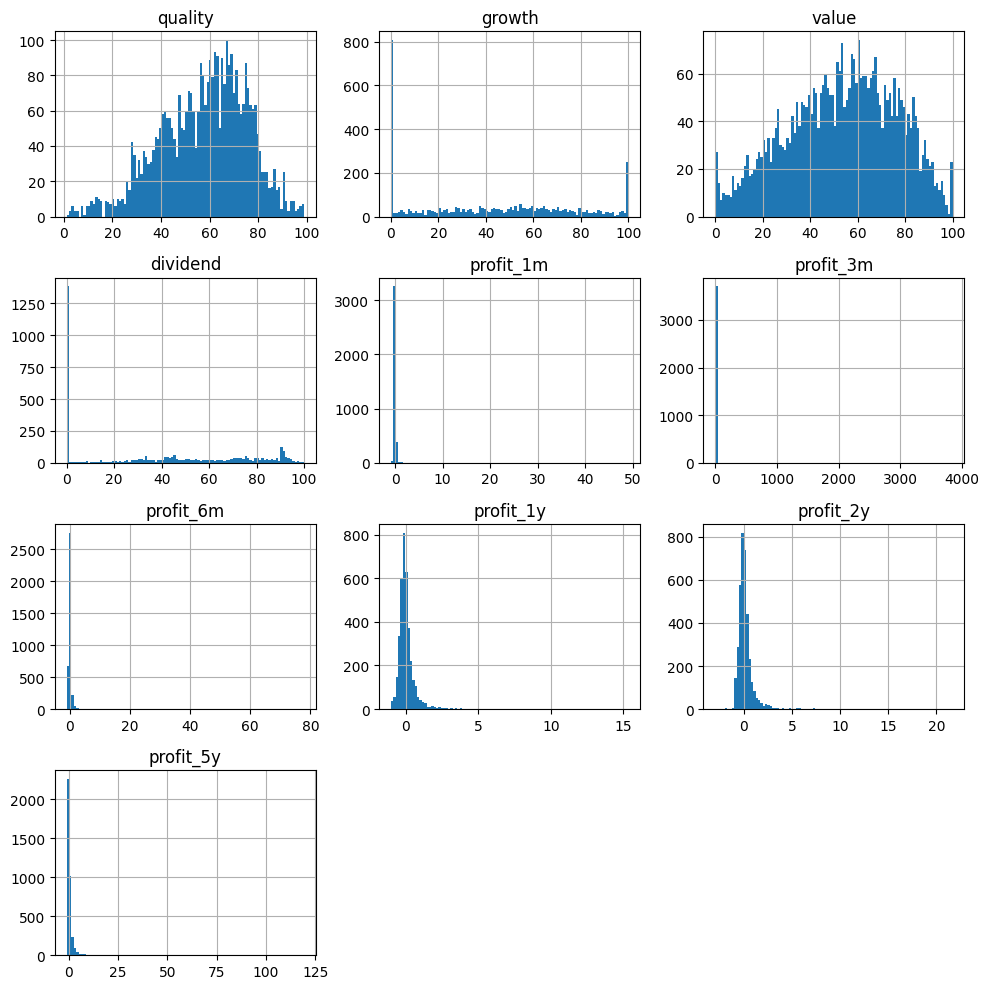

<Figure size 1920x1440 with 0 Axes>

In [4]:
# distribution of the data
df_no_nan.hist(figsize=(10, 10), bins=100)
plt.tight_layout()  # Adjust spacing between subplots
plt.show(block=False)  # Show plot without blocking
plt.gcf().set_dpi(300)  # Increase DPI for higher resolution


# Create a normalized version of the dataframe
# Select only numeric columns
numeric_columns = df_no_nan.select_dtypes(include=["float64", "int64"]).columns

# Normalize only numeric columns
df_normalized = df_no_nan.copy()
for column in numeric_columns:
    df_normalized[column] = (
        2
        * (
            (df_no_nan[column] - df_no_nan[column].min())
            / (df_no_nan[column].max() - df_no_nan[column].min())
        )
        - 1
    )

### Deeper plots

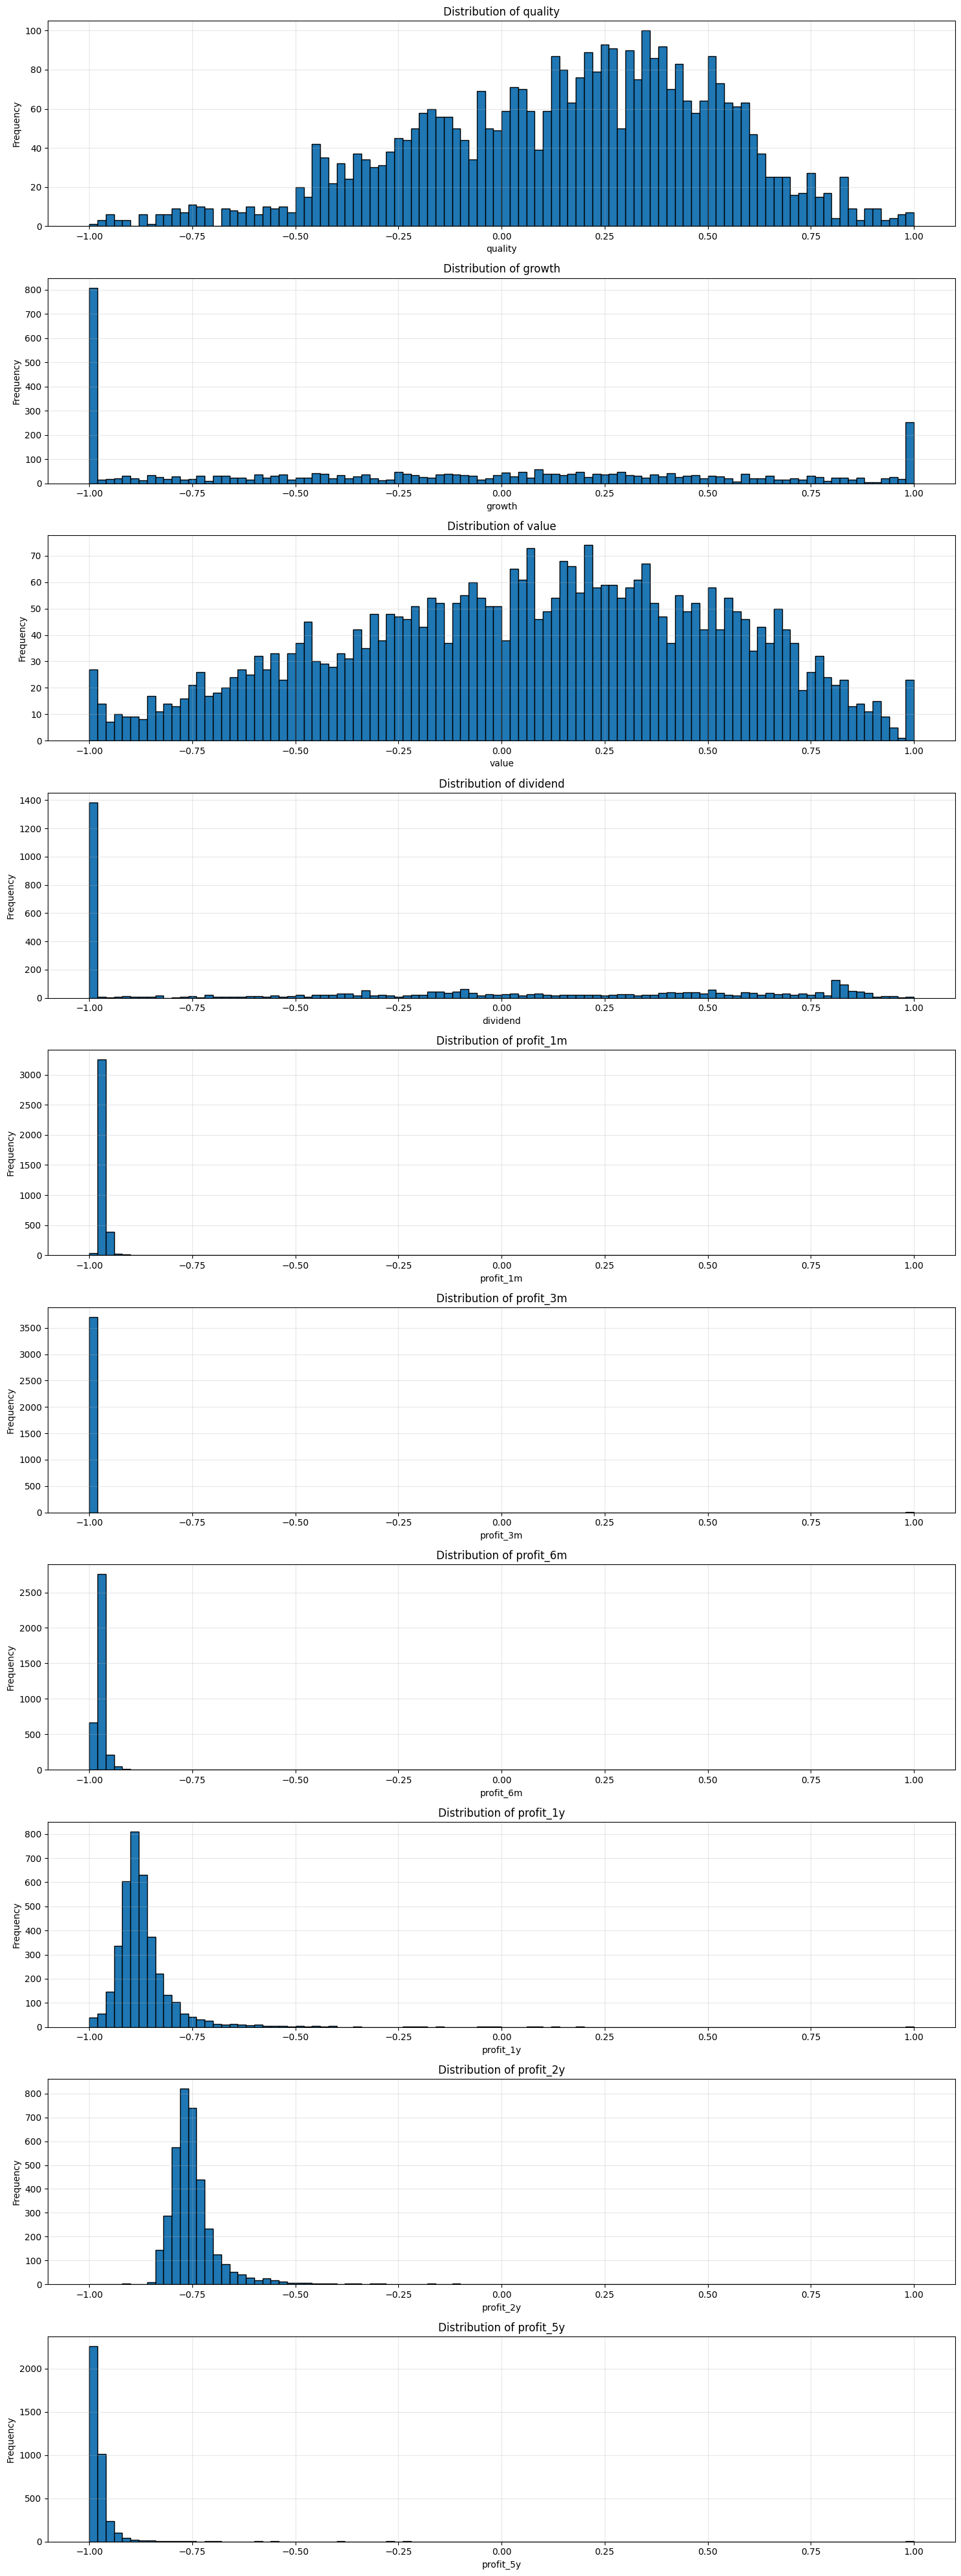

In [5]:
# Create individual histograms for each numeric column
plt.figure(
    figsize=(15, len(numeric_columns) * 4)
)  # Adjust figure size based on number of columns

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    plt.hist(df_normalized[column], bins=100, edgecolor="black")
    # plt.hist(df[column], bins=100, edgecolor="black") # Note: change this for original data

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Excluding outliers

Number of outliers removed: 195


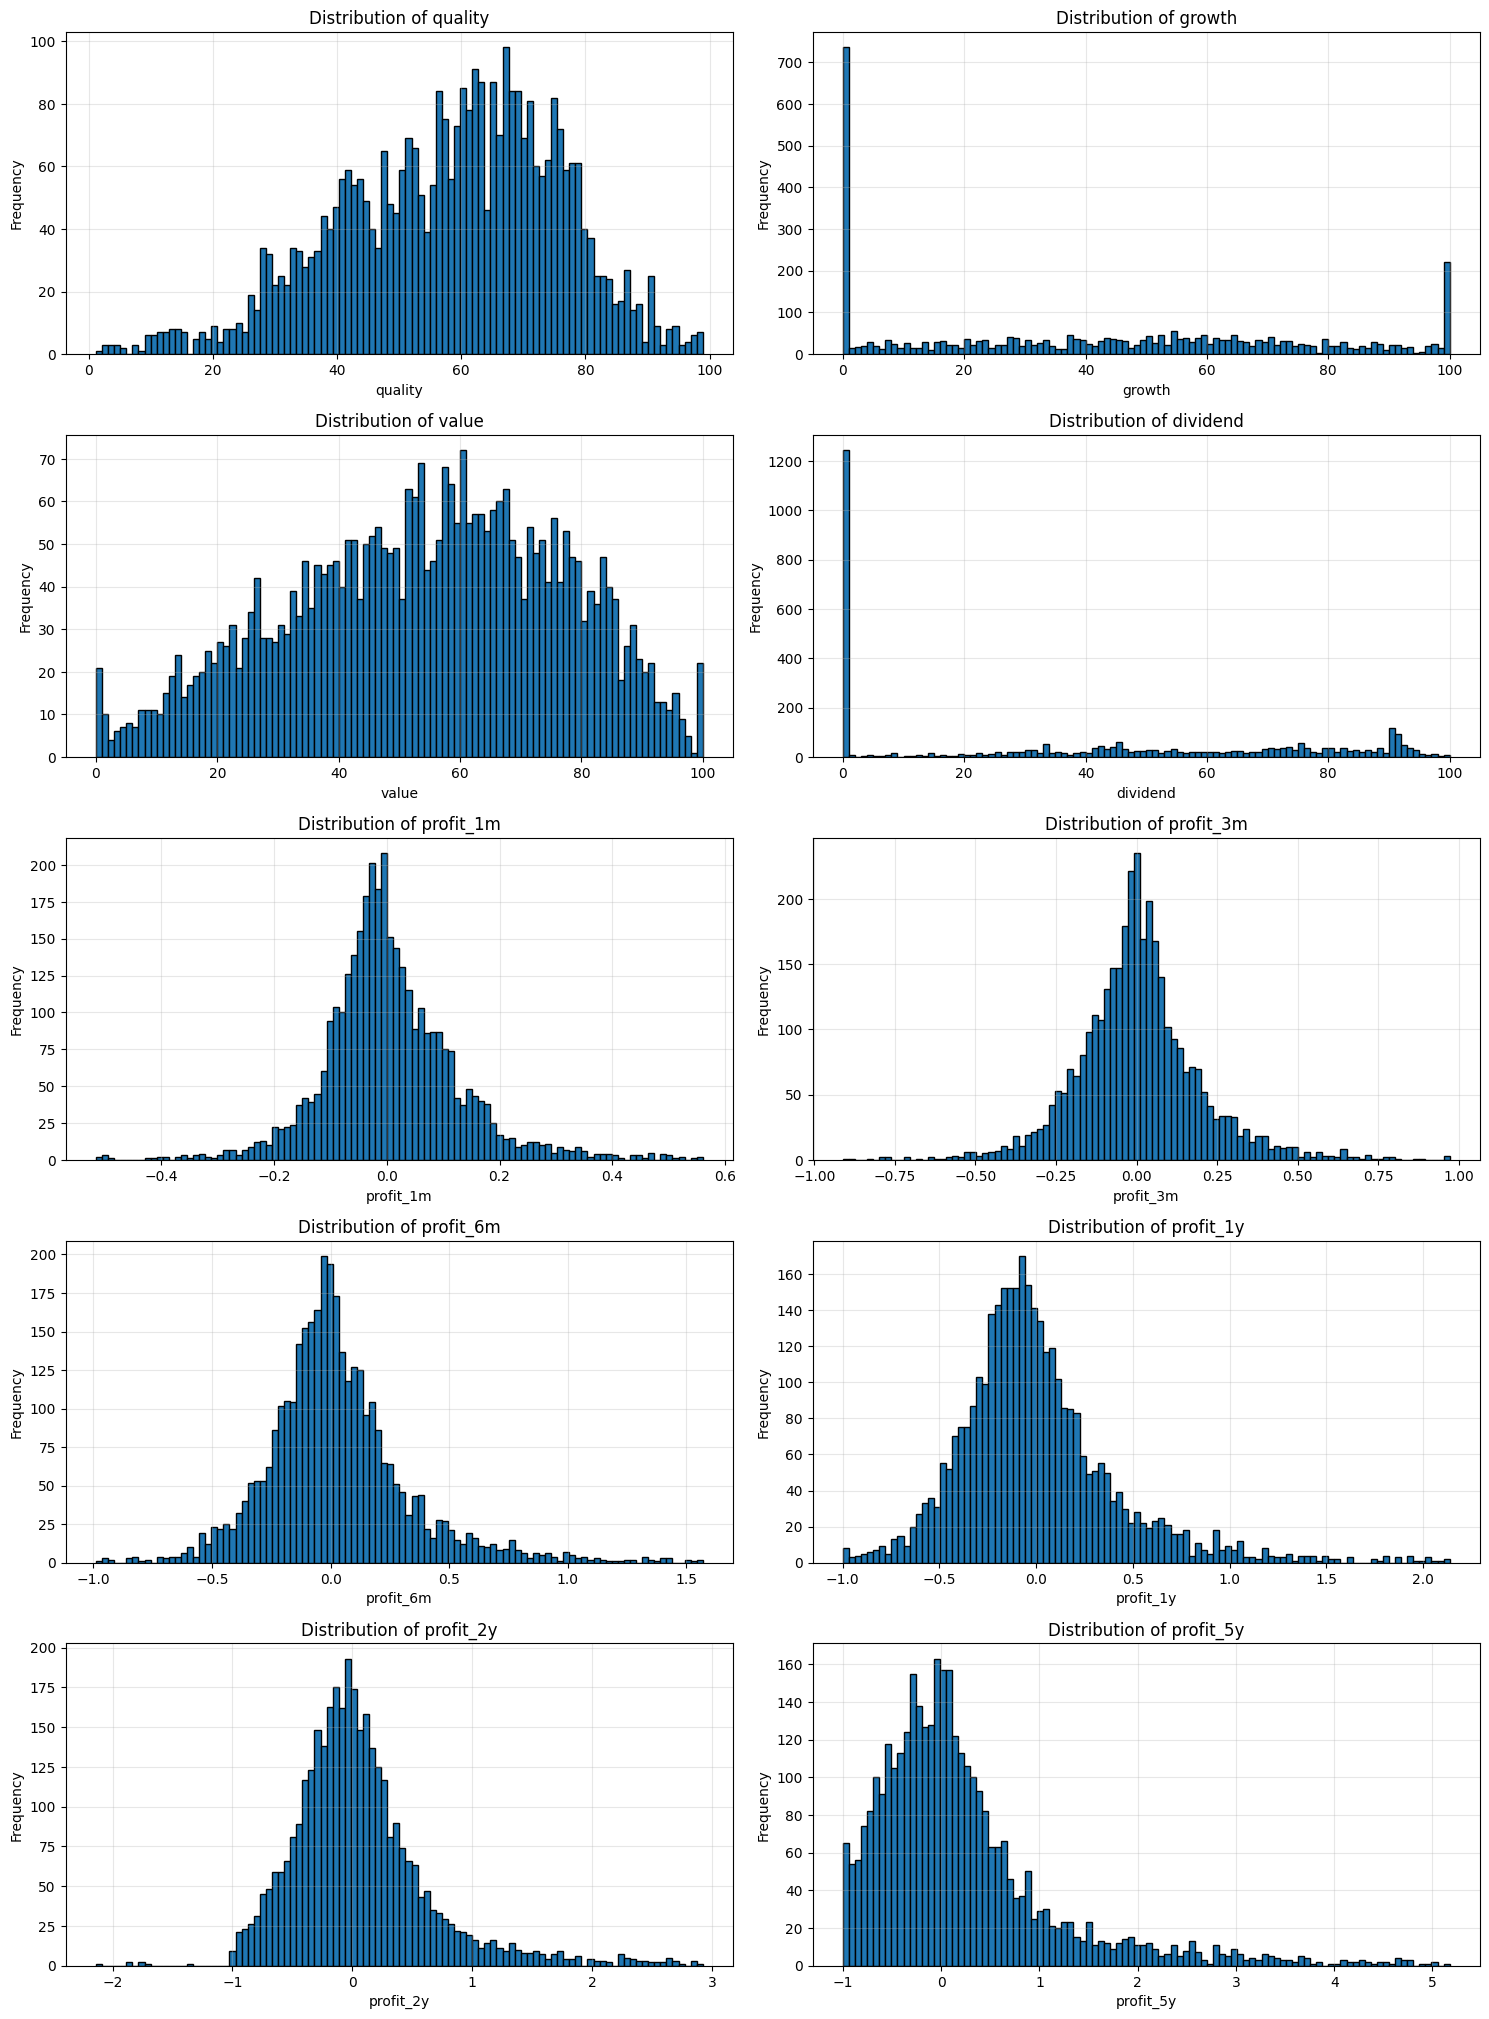

In [9]:
# Exclude outliers from market cap, and profits
# Calculate Q1, Q3, and IQR for market cap and profits
exclude_outliers = 0.1  # % of outliers to exclude

# # market cap
# Q1_market_cap = df_no_nan["market_cap_usd"].quantile(exclude_outliers)
# Q3_market_cap = df_no_nan["market_cap_usd"].quantile(1 - exclude_outliers)
# IQR_market_cap = Q3_market_cap - Q1_market_cap

# # enterprise value
# Q1_enterprise_value = df_no_nan["enterprise_value_usd"].quantile(exclude_outliers)
# Q3_enterprise_value = df_no_nan["enterprise_value_usd"].quantile(1 - exclude_outliers)
# IQR_enterprise_value = Q3_enterprise_value - Q1_enterprise_value

# # volume
# Q1_volume = df_no_nan["volume"].quantile(exclude_outliers)
# Q3_volume = df_no_nan["volume"].quantile(1 - exclude_outliers)
# IQR_volume = Q3_volume - Q1_volume

# Profits

Q1_profit_1m = df_no_nan["profit_1m"].quantile(exclude_outliers)
Q1_profit_3m = df_no_nan["profit_3m"].quantile(exclude_outliers)
Q1_profit_6m = df_no_nan["profit_6m"].quantile(exclude_outliers)
Q1_profit_1y = df_no_nan["profit_1y"].quantile(exclude_outliers)
Q1_profit_2y = df_no_nan["profit_2y"].quantile(exclude_outliers)
Q1_profit_5y = df_no_nan["profit_5y"].quantile(exclude_outliers)
Q3_profit_1m = df_no_nan["profit_1m"].quantile(1 - exclude_outliers)
Q3_profit_3m = df_no_nan["profit_3m"].quantile(1 - exclude_outliers)
Q3_profit_6m = df_no_nan["profit_6m"].quantile(1 - exclude_outliers)
Q3_profit_1y = df_no_nan["profit_1y"].quantile(1 - exclude_outliers)
Q3_profit_2y = df_no_nan["profit_2y"].quantile(1 - exclude_outliers)
Q3_profit_5y = df_no_nan["profit_5y"].quantile(1 - exclude_outliers)


# # Define bounds for outliers (using 1.5 * IQR rule)
# lower_bound_market_cap = Q1_market_cap - 1.5 * IQR_market_cap
# upper_bound_market_cap = Q3_market_cap + 1.5 * IQR_market_cap

# lower_bound_enterprise_value = Q1_enterprise_value - 1.5 * IQR_enterprise_value
# upper_bound_enterprise_value = Q3_enterprise_value + 1.5 * IQR_enterprise_value

# lower_bound_volume = Q1_volume - 1.5 * IQR_volume
# upper_bound_volume = Q3_volume + 1.5 * IQR_volume


lower_bound_profit_1m = Q1_profit_1m - 1.5 * (Q3_profit_1m - Q1_profit_1m)
lower_bound_profit_3m = Q1_profit_3m - 1.5 * (Q3_profit_3m - Q1_profit_3m)
lower_bound_profit_6m = Q1_profit_6m - 1.5 * (Q3_profit_6m - Q1_profit_6m)
lower_bound_profit_1y = Q1_profit_1y - 1.5 * (Q3_profit_1y - Q1_profit_1y)
lower_bound_profit_2y = Q1_profit_2y - 1.5 * (Q3_profit_2y - Q1_profit_2y)
lower_bound_profit_5y = Q1_profit_5y - 1.5 * (Q3_profit_5y - Q1_profit_5y)

upper_bound_profit_1m = Q3_profit_1m + 1.5 * (Q3_profit_1m - Q1_profit_1m)
upper_bound_profit_3m = Q3_profit_3m + 1.5 * (Q3_profit_3m - Q1_profit_3m)
upper_bound_profit_6m = Q3_profit_6m + 1.5 * (Q3_profit_6m - Q1_profit_6m)
upper_bound_profit_1y = Q3_profit_1y + 1.5 * (Q3_profit_1y - Q1_profit_1y)
upper_bound_profit_2y = Q3_profit_2y + 1.5 * (Q3_profit_2y - Q1_profit_2y)
upper_bound_profit_5y = Q3_profit_5y + 1.5 * (Q3_profit_5y - Q1_profit_5y)


# Create a new dataframe excluding outliers
df_no_outliers = df_no_nan[
    # (df_no_nan["market_cap_usd"] >= lower_bound_market_cap)
    # & (df_no_nan["market_cap_usd"] <= upper_bound_market_cap)
    (df_no_nan["profit_1m"] >= lower_bound_profit_1m)
    & (df_no_nan["profit_1m"] <= upper_bound_profit_1m)
    & (df_no_nan["profit_3m"] >= lower_bound_profit_3m)
    & (df_no_nan["profit_3m"] <= upper_bound_profit_3m)
    & (df_no_nan["profit_6m"] >= lower_bound_profit_6m)
    & (df_no_nan["profit_6m"] <= upper_bound_profit_6m)
    & (df_no_nan["profit_1y"] >= lower_bound_profit_1y)
    & (df_no_nan["profit_1y"] <= upper_bound_profit_1y)
    & (df_no_nan["profit_2y"] >= lower_bound_profit_2y)
    & (df_no_nan["profit_2y"] <= upper_bound_profit_2y)
    & (df_no_nan["profit_5y"] >= lower_bound_profit_5y)
    & (df_no_nan["profit_5y"] <= upper_bound_profit_5y)
    # & (df_no_nan["volume"] >= lower_bound_volume)
    # & (df_no_nan["volume"] <= upper_bound_volume)
    # & (df["enterprise_value_usd"] >= lower_bound_enterprise_value)
    # & (df["enterprise_value_usd"] <= upper_bound_enterprise_value)
    #     & (df["growth"] != 0)
    #     & (df["growth"] != 100)
    #     & (df["value"] != 0)
    #     & (df["value"] != 100)
]

# Print the shape before and after removing outliers
# print(f"Original dataset shape: {df.shape}")
# print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {df_no_nan.shape[0] - df_no_outliers.shape[0]}")

# New histograms to check the outliers
# Create histograms for each numeric column in the cleaned dataset
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 2, idx)
    plt.hist(df_no_outliers[column], bins=100, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()

Data Retention:
Original records: 3,706
Cleaned records: 3,511
Retention rate: 94.74%

Comparison of key statistics:

quality:
Original mean: 57.62
Cleaned mean: 58.09
Original std: 17.90
Cleaned std: 17.59

growth:
Original mean: 42.08
Cleaned mean: 42.01
Original std: 33.38
Cleaned std: 32.98

value:
Original mean: 53.31
Cleaned mean: 54.07
Original std: 22.76
Cleaned std: 22.35

dividend:
Original mean: 37.82
Cleaned mean: 39.11
Original std: 35.18
Cleaned std: 35.07

profit_1m:
Original mean: 0.03
Cleaned mean: 0.01
Original std: 0.84
Cleaned std: 0.12

profit_3m:
Original mean: 1.07
Cleaned mean: 0.00
Original std: 63.18
Cleaned std: 0.19

profit_6m:
Original mean: 0.10
Cleaned mean: 0.03
Original std: 1.37
Cleaned std: 0.31

profit_1y:
Original mean: 0.08
Cleaned mean: 0.00
Original std: 0.71
Cleaned std: 0.41

profit_2y:
Original mean: 0.15
Cleaned mean: 0.06
Original std: 0.97
Cleaned std: 0.58

profit_5y:
Original mean: 0.44
Cleaned mean: 0.22
Original std: 2.77
Cleaned std: 0

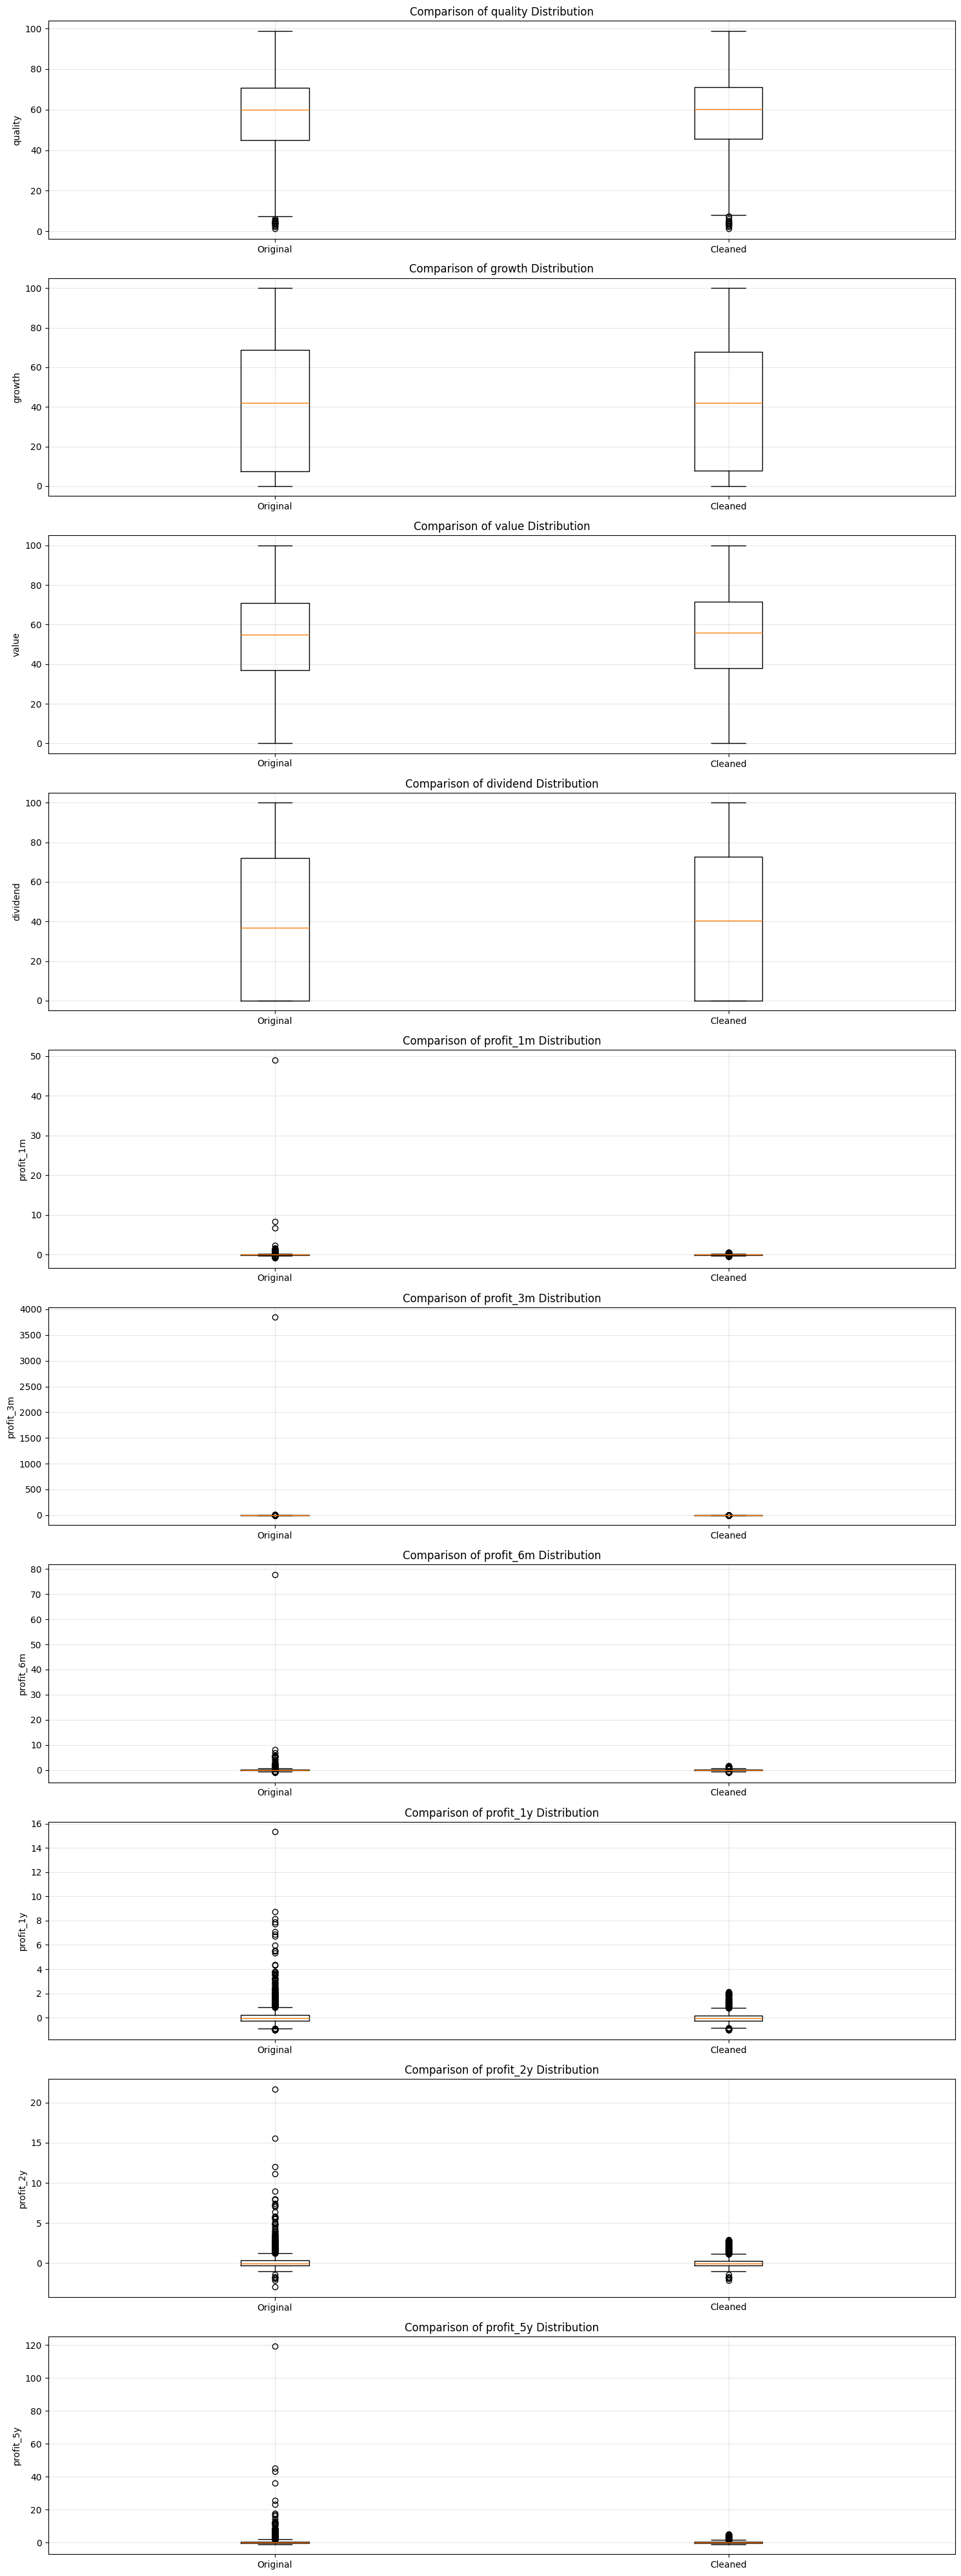

In [10]:
# Now compare the original and the cleaned data
# Create a new dataframe with the original data
df_original = df_no_nan.copy()

# Create a new dataframe with the cleaned data
df_cleaned = df_no_outliers.copy()

# Calculate basic statistics for both datasets
original_stats = df_original.describe()
cleaned_stats = df_cleaned.describe()

# Calculate the percentage of data retained
retention_rate = (len(df_cleaned) / len(df_original)) * 100

print("Data Retention:")
print(f"Original records: {len(df_original):,}")
print(f"Cleaned records: {len(df_cleaned):,}")
print(f"Retention rate: {retention_rate:.2f}%\n")

# Compare means and standard deviations
print("Comparison of key statistics:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Original mean: {df_original[column].mean():,.2f}")
    print(f"Cleaned mean: {df_cleaned[column].mean():,.2f}")
    print(f"Original std: {df_original[column].std():,.2f}")
    print(f"Cleaned std: {df_cleaned[column].std():,.2f}")

# Create side-by-side box plots for visual comparison
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)

    # Create box plots
    box_data = [df_original[column], df_cleaned[column]]
    plt.boxplot(box_data, tick_labels=["Original", "Cleaned"])

    plt.title(f"Comparison of {column} Distribution")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)

plt.tight_layout()

# Export cleaned data

In [11]:
# Create 'data' directory if it doesn't exist
import os

if not os.path.exists("data"):
    os.makedirs("data")

# Export the cleaned dataset to CSV
cleaned_data_path = "data/1.5k_cleaned_data__22.csv"
df_cleaned.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data exported to: {cleaned_data_path}")

Cleaned data exported to: data/1.5k_cleaned_data__22.csv
